In [ ]:
#Carga de librerias
from PIL import Image
import os
import numpy as np

# Ruta a la carpeta que contiene las imágenes
folder_path = ''

# Lista para almacenar las imágenes cargadas
image_list_train = []
#Lista para almacenar las etiquetas
y_train = []
# Recorre todos los archivos en la carpeta
for filename in os.listdir(folder_path):
    if 'Clima' in filename:
      y_train.append([1,0,0,0,0])
    elif 'Persona' in filename:
      y_train.append([0,1,0,0,0])
    elif 'PistaDeAterrizaje' in filename:
      y_train.append([0,0,1,0,0])
    elif 'aeronave' in filename:
      y_train.append([0,0,0,1,0])
    elif 'Vehiculo' in filename:
      y_train.append([0,0,0,0,1])
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path)
        img = img.resize((300, 300))  # Redimensiona la imagen
        img_array = np.array(img) / 255.0  # Normaliza los valores de píxeles
        image_list_train.append(img_array)

# Ahora 'image_list_train' contiene todas las imágenes cargadas


In [ ]:
#Carga de librerias
from PIL import Image
import os
import numpy as np

# Ruta a la carpeta que contiene las imágenes
folder_path = '/content/drive/MyDrive/MachineLearning/test'

# Lista para almacenar las imágenes cargadas
image_list_test = []
#Lista para almacenar las etiquetas
y_test = []
# Recorre todos los archivos en la carpeta
for filename in os.listdir(folder_path):
    if 'Clima' in filename:
      y_test.append([1,0,0,0,0])
    elif 'Persona' in filename:
      y_test.append([0,1,0,0,0])
    elif 'PistaDeAterrizaje' in filename:
      y_test.append([0,0,1,0,0])
    elif 'aeronave' in filename:
      y_test.append([0,0,0,1,0])
    elif 'Vehiculo' in filename:
      y_test.append([0,0,0,0,1])
    if filename.endswith(".jpg") or filename.endswith(".jpeg") :
        img_path = os.path.join(folder_path, filename)
        img = Image.open(img_path)
        img = img.resize((300, 300))  # Redimensiona la imagen
        img_array = np.array(img) / 255.0  # Normaliza los valores de píxeles
        image_list_test.append(img_array)

# Ahora 'image_list_test' contiene todas las imágenes cargadas


In [ ]:
y_test

[[0, 1, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1],
 [0, 0, 0, 0, 1],
 [0, 0, 0, 1, 0]]

In [ ]:
type(y_train)

list

In [ ]:
#Carga de librerias
import tensorflow as tf
import keras
from keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Dense, Flatten
keras.utils.set_random_seed(812)
model = models.Sequential()
tam_kernel1 = (3,3)
model.add(layers.Conv2D(224, tam_kernel1, activation='relu', input_shape=(300, 300, 3)))
tam_pooling1 = (2,2)
model.add(layers.MaxPooling2D(tam_pooling1))
tam_kernel2 = (3,3)
model.add(layers.Conv2D(128, tam_kernel2, activation='relu'))
tam_pooling2 = (2,2)
model.add(layers.MaxPooling2D(tam_pooling2))
tam_kernel3 = (3,3)
model.add(layers.Conv2D(64, tam_kernel3, activation='relu'))
tam_pooling3 = (2,2)
model.add(layers.MaxPooling2D(tam_pooling3))
tam_kernel4 = (3,3)

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5,activation='softmax'))

In [ ]:
#Se compila el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Verificamos la estructura de salida esperada para entrenamiento
y_train

[[1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1],
 [0, 0, 0, 0, 1],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 0, 1],
 [0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 1, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 0, 0, 1],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1],
 [0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1],
 [0, 0, 0, 0, 1]]

In [ ]:
#Cambiamos la forma
image_list_train = np.array(image_list_train)
y_train = np.array(y_train)

In [ ]:
#Verificamos el cambio
y_train.shape

(27, 5)

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
image_list_train.shape

(27, 300, 300, 3)

In [ ]:
#Ajustamos("Entrenamos") el modelo al conjunto de datos
ajuste = %time model.fit(image_list_train,y_train,epochs=100,batch_size=16)
ajuste

Epoch 1/100
2/2 [==============================] - 2s 180ms/step - loss: 4.5737 - accuracy: 0.0741
Epoch 2/100
2/2 [==============================] - 0s 140ms/step - loss: 1.6056 - accuracy: 0.1852
Epoch 3/100
2/2 [==============================] - 0s 134ms/step - loss: 1.6533 - accuracy: 0.3333
Epoch 4/100
2/2 [==============================] - 0s 130ms/step - loss: 1.5290 - accuracy: 0.2222
Epoch 5/100
2/2 [==============================] - 0s 170ms/step - loss: 1.5068 - accuracy: 0.2963
Epoch 6/100
2/2 [==============================] - 0s 141ms/step - loss: 1.3908 - accuracy: 0.3333
Epoch 7/100
2/2 [==============================] - 0s 135ms/step - loss: 1.3067 - accuracy: 0.4444
Epoch 8/100
2/2 [==============================] - 0s 128ms/step - loss: 1.1343 - accuracy: 0.8148
Epoch 9/100
2/2 [==============================] - 0s 132ms/step - loss: 1.1243 - accuracy: 0.5185
Epoch 10/100
2/2 [==============================] - 0s 127ms/step - loss: 0.9304 - accuracy: 0.7037
Epoch 11/

In [ ]:
%time y_train

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 7.87 µs


array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [ ]:
#Cambiamos el formato al conjunto de prueba
image_list_test = np.array(image_list_test)
y_test = np.array(y_test)

In [ ]:
#Verificamos su forma
y_test

array([[0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0]])

In [ ]:
#Usamos el modelo para predecir con el conjunto de prueba
y_pred = model.predict(image_list_test) #Esto genera una salida predicha

1/1 [==============================] - 0s 73ms/step


In [ ]:
#Revisamos el resultado
y_pred

array([[1.16504783e-11, 5.60096502e-02, 7.95626223e-01, 8.08515176e-02,
        6.75126836e-02],
       [4.25901847e-09, 9.97534990e-01, 1.02459035e-06, 2.46392540e-03,
        4.18962331e-09],
       [9.45489168e-01, 4.23287302e-02, 5.89172714e-06, 1.21754119e-02,
        7.58369538e-07],
       [1.00000000e+00, 5.24318212e-16, 3.95684651e-13, 3.47027772e-14,
        9.55322627e-13],
       [2.45392312e-05, 1.23171107e-04, 4.42958626e-05, 9.98372257e-01,
        1.43584865e-03],
       [1.15302704e-01, 1.48278734e-04, 5.95759273e-01, 2.36513908e-04,
        2.88553268e-01],
       [8.15767692e-07, 2.59612534e-05, 2.42017813e-05, 9.99948740e-01,
        2.10822080e-07],
       [5.42903015e-16, 5.88349482e-17, 1.04553192e-10, 1.00000000e+00,
        1.36365019e-12],
       [1.27500146e-11, 7.22257383e-08, 1.33581580e-05, 1.07567712e-05,
        9.99975801e-01],
       [1.71263739e-10, 2.31999077e-12, 1.39855611e-05, 9.99986053e-01,
        2.11568918e-09]], dtype=float32)

In [ ]:
#Redondeamos los resultados
y_pred=np.round(y_pred)
y_pred

array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
#Se importan las librerias
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
#Cambio de tipo de datos en caso de necesitarlo
if y_test.dtype == object:
    y_test1 = y_test.astype(int)
if y_pred.dtype == object:
    y_pred1 = y_pred.astype(int)
y_test2 = pd.Series(y_test.ravel())
y_pred2 = pd.Series(y_pred.ravel())

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred,average='micro')

# Recall
recall = recall_score(y_test, y_pred,average='micro')

# F1 Score
f1 = f1_score(y_test, y_pred,average='micro')

# Imprime los resultados
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.70
Precision: 0.70
Recall: 0.70
F1 Score: 0.70


In [ ]:
y_test

array([[0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0]])

In [ ]:
y_pred

array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
!pip install imbalanced-learn

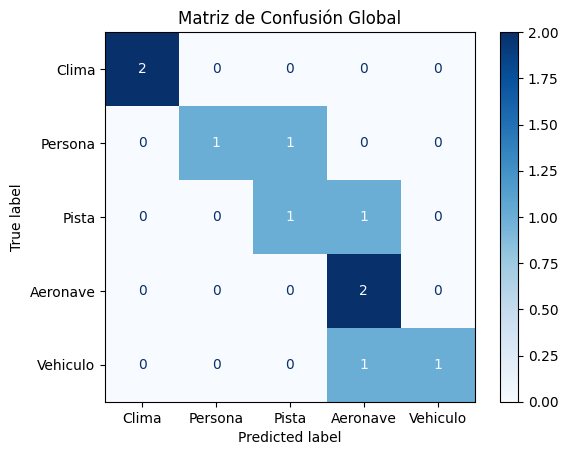

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Calcular la matriz de confusión
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test_labels, y_pred_labels)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Clima', 'Persona', 'Pista','Aeronave','Vehiculo'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión Global')
plt.show()

In [ ]:
# prompt: como guardo el modelo

model.save('/content/drive/MyDrive/MachineLearning/modelo_entrenado.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
